## Teoría difraccional de la imagen.  Teoría de Abbe de la formación de la imagen con iluminación coherente

Durante el estudio de los efectos de la difracción, hemos visto que la presencia de una apertura con una cierta anchura modifica la irradiancia observada en una pantalla situada detrás de dicha apertura. Cuanto menor sea su tamaño, el frente de ondas de la luz incidente se verá más cortado, y el haz se alejará más de la propagación rectilínea. Más concretamente, si tenemos una apertura circular, el tamaño de la mancha de Airy en la pantalla será mayor cuando menor sea la apertura. 

Si trasladamos estas observaciones a la formación de la imagen por parte de un sistema óptico, podemos suponer ya que los efectos de la difracción jugarán un papel importante. Dado que todo sistema óptico, ya sea por la presencia de diafragmas o bien por la propia montura de las lentes, limita la extensión del haz que entra en él, la imagen de un punto no será otro punto tal y como predice la Óptica Geométrica para sistemas perfectos, sino una mancha de cierta extensión.

En el presente notebook vamos a describir la teoría de Abbe de la formación de la imagen cuando el objeto es iluminado con luz coherente. Este caso se da especialmente en la visualización de objetos pequeños a través de un microscopio. De acuerdo con Abbe, el objeto actúa como una red de difracción, por lo que tenemos que tener en cuenta la interferencia entre las ondas secundarias emitidas por cada punto del objeto.

[Más sobre la vida y logros de Abbe](http://www.osa-opn.org/home/articles/volume_18/issue_2/features/ernst_abbe_and_the_foundation_of_scientific_micros/#.UZILjaq0V4c)

Para ilustrar esta teoría, vamos a analizar el caso en el que el objeto es propiamente una red de difracción con paso $d$ y que se encuentra iluminada por una onda plana monocromática que incide perpendicularmente a la red. Si nos centramos en lo que obtenemos en el plano focal imagen del sistema óptico, ya sabemos que en dicho plano tendremos los distintos órdenes de difracción dados por la ecuación de la red 

$$d sen(\theta) = m \lambda$$ 

Teniendo en cuenta que $tan(\theta) = y/f'$, donde $y$ es la distancia al eje de un punto en el plano focal, podemos saber dónde tendremos los máximos de irradiancia correspondientes a cada orden de difracción, 

$$y = \frac{ m \lambda f'}{d} $$

donde en esta última expresión se ha realizado la aproximación $sen(\theta) \sim tan(\theta) = y/f'$.


Cada uno de estos puntos podemos considerarlo como centro emisor de ondas secundarias, cuya amplitud dependerá de la amplitud de ese orden de difracción. Estas ondas secundarias interferirán unas con otras, dando lugar a la imagen de la red en el plano predicho por la Óptica Geométrica. Para tener una imagen fiel de la red, tendremos que sumar las contribuciones de todos los órdenes de difracción, ya que todos ellos llevan información de la forma de la red. Sin embargo, el tamaño finito de la apertura del sistema va a tener como consecuencia que podamos cortar los órdenes de difracción más altos, y por tanto modificamos la imagen final. Este problema se ve paliado en parte por la disminución de la amplitud que sufren los órdenes más altos, y por tanto, su contribución a la imagen será también menor.

Vamos a verlo con el siguiente código. En él se halla la distancia `D` entre el plano imagen y el plano focal del sistema, la posición en este plano de los órdenes de difracción (`yfoc` en el código) y se suman las ondas emitidas por cada uno de estos puntos con el correspondiente desfase entre ellas debido a la diferencia de cámino óptico (este punto es similar a cómo hallamos la irradiancia dada por una red de difracción en una pantalla a una cierta distancia). Finalmente el parámetro `norden` nos da el número de órdenes que incluimos en la suma. 

* Propuesta: Cambiar el número `norden` para limitar el número de órdenes de difracción que contribuyen a la imagen final. Ver cómo afecta a la imagen final este cambio.


Welcome to pylab, a matplotlib-based Python environment [backend: module://IPython.zmq.pylab.backend_inline].
For more information, type 'help(pylab)'.


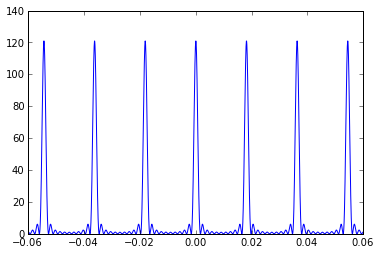

In [1]:
%pylab inline
# No se tiene en cuenta la diferente energía que lleva cada orden de difracción
Lambda = 555e-6 # longitud de onda en mm
k = 2.0*pi/Lambda
focal = 200.0 # mm
sobj = -300.0 # mm
sim = 1.0/(1.0/focal + 1.0/sobj)
D = sim - focal
norden=5
m_vec = np.arange(norden*2+1)-norden
d = 1.0/100 # paso de la red en mm
theta_m = np.arcsin(Lambda*m_vec/d)
yfoc = focal*tan(theta_m)

x_p = linspace(-0.06,.06,5000)
Delta = (yfoc[1]-yfoc[0])*x_p/D
N = len(m_vec)
E0 = 1.0
fases = zeros(((N),len(x_p)),dtype=complex)
for i in range(len(fases)):
    fases[i,:] = 1j*k*i*Delta
Etotal = sum(exp(fases),axis=0)*E0
Itotal = abs(Etotal)**2

plot(x_p,Itotal)


Hemos visto anteriormente que el diámetro finito del sistema puede limitar los órdenes más altos, lo que puede conllevar una pérdida de fidelidad de la imagen final ya que la interferencia se realiza con un número menor de ondas. Sin embargo podemos también utilizar este enfoque para estudiar la formación de la imagen con iluminación coherente para modificar a nuestra voluntad la imagen final. Es decir, ¿qué ocurre por ejemplo si bloqueamos el orden 0 y mantenemos únicamente el orden 1 y -1?


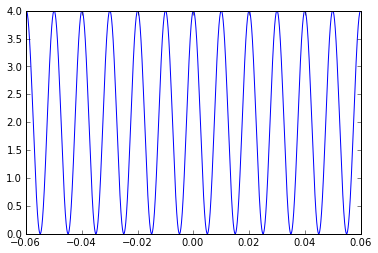

In [2]:
norden=1
m_vec = np.arange(norden*2+1)-norden
theta_m = np.arcsin(Lambda*m_vec/d)
yfoc = focal*tan(theta_m)


Delta = (yfoc[1]-yfoc[0])*x_p/D
N = len(m_vec)
E0 = 1.0
fases = zeros(((N),len(x_p)),dtype=complex)
for i in range(len(fases)):
    fases[i,:] = 1j*k*i*Delta
Etotal = sum(exp(fases),axis=0)*E0
#remove contribution from zero order
indzero = np.where(m_vec==0)
Etotal = (sum(exp(fases),axis=0)-exp(fases[indzero[0][0],:]))*E0
Itotal = abs(Etotal)**2
plot(x_p,Itotal)

Vemos que obtenemos una imagen de forma cosenoidal, es decir, franjas de interferencia. Este resultado era previsible ya que según la disposición que hemos fijado, tenemos dos fuentes puntuales separadas por una cierta distancia, es decir, un caso análogo al experimento de Young. La separación entre máximos (interfranja) se puede observar que es igual a $0.01 \;\;$ mm. Hay que hacer notar que esta separación no es el periodo espacial esperable de la imagen final. Este periodo vendrá modificado por el aumento lateral del sistema y vendrá dado por $d' = \beta d$, donde $\beta = s' / s$. En nuestro caso, eso nos da un periodo espacial de la imagen $d' = 0.02\;\;$ mm

### Método de Contraste de Fase.

Aunque el ejemplo anterior nos permite adivinar que actuando en el plano focal de la lente podemos modificar la imagen final, no da una idea clara de las aplicaciones que este procedimiento podría tener. Para ejemplificar estas aplicaciones vamos a ver muy brevemente en qué consiste el método de contraste de fase. Este método de observación fue introducido por Zernike y por él le fue otorgado el premio Nobel en 1953.

El método de contraste de fase nos permite visualizar objetos transparentes en donde por tanto no hay cambios en la amplitud de la onda transmitida a través de ellos, aunque sí lo hay en la fase de dicha onda, debido a la diferencia de camino óptico que ha de recorrer al atravesar el objeto. Objetos de este tipo se encuentran frecuentemente en biología o cristalografía y debido a que no cambian hay cambios en la amplitud de la onda, no es posible observarlos con técnicas de microscopía tradicionales. 

En lo que consiste este método es en actuar en el plano focal imagen del sistema óptico para transformar esos cambios de fase en el objeto en cambios en la irradiancia en el plano imagen. Más concretamente, situamos una lámina delgada en el plano focal imagen de modo que introducimos un desfase de $\pi /2$ en el orden cero de difracción situado en el eje. Se puede demostrar que este cambio en la fase del orden cero, provoca que los cambios de fase introducidos por el objeto se transformen en cambios en la irradiancia en la imagen final, permitiendo visualizar de este modo el objeto.

Veamos esto brevemente. Si el objeto produce una variación unidimensional de la fase $\phi(x) \;\;$, la función de transmisión del objeto será $F(x) = e^{i \phi(x)} \;\;$, que si la variación de fase es pequeña, se puede aproximar por $F(x) \simeq 1 + i \phi(x) \;\;$. El sistema óptico por tanto dará una imagen con una irradiancia, 

$$I_{im} \propto | 1 + i \phi(x) |^2 \simeq 1$$

donde se ha considerado que la fase $\phi(x)$ es pequeña. Se puede ver por tanto que la irradiancia es básicamente constante en el plano imagen. Sin embargo, si actuamos sobre el plano focal cambiando la fase del orden cero de difracción, se puede demostrar que la irradiancia es entonces, 

$$I_{im} \propto | \pm i + i \phi(x) |^2 \simeq 1 \pm 2 \phi(x)$$

Por tanto la irradiancia en el plano imagen cambia, siendo proporcional a los cambios de fase introducidos por el objeto. El signo del último término depende del desfase introducido por la lámina en el plano focal.

Un desarrollo más profundo de este método queda fuera de los objetivos del presente curso, pero se puede consultar más sobre el método de contraste de fase por ejemplo en los siguientes enlaces y bibliografía:

[Introducción al método de contraste de fase (en Inglés)](http://www.microscopyu.com/articles/phasecontrast/phasemicroscopy.html)

[Teoría del Microscopio](http://www.leica-microsystems.com/fileadmin/downloads/Leica%20DM750%20P/Brochures/Leica_Theory_of_the_microscope_RvA-Booklet_ES.pdf)[PDF]
